In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading Data
df = pd.read_csv('dataset.csv')

In [3]:
# visualizing data
# head() shows the first 5 elements
df.head()

,Humidity,Temperature
0,0.596606,13.182462
1,0.656572,8.156680
2,0.141856,32.713142
3,0.757360,6.282035
4,0.613228,12.675158


In [4]:
# check data summary
df.describe

<bound method NDFrame.describe of      Humidity  Temperature
0    0.596606    13.182462
1    0.656572     8.156680
2    0.141856    32.713142
3    0.757360     6.282035
4    0.613228    12.675158
..        ...          ...
295  0.615160     3.892790
296  0.524208    15.616094
297  0.647608     4.596190
298  0.410353    18.160583
299  0.545477    12.561416

[300 rows x 2 columns]>

In [5]:
# To check if any null value is present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     300 non-null    float64
 1   Temperature  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [6]:
# data we got are in pandas dataframe format we need to cast it in numpy array for calulations
X = np.array(df.Humidity)
Y = np.array(df.Temperature)

In [7]:
# visualising the casted data
X,Y

(array([0.59660557, 0.6565718 , 0.14185593, 0.75736019, 0.6132277 ,
        1.        , 0.37765582, 0.81530631, 0.14710403, 0.54084904,
        0.40111164, 0.63795111, 0.50777642, 0.38660157, 0.26278949,
        0.55632409, 0.42536876, 0.28533024, 0.77777599, 0.48510097,
        0.33574147, 0.20408699, 0.45590515, 0.58986282, 0.69648899,
        0.56542957, 0.56236459, 0.50741162, 0.38802306, 0.33265169,
        0.32438614, 0.73042008, 0.53763537, 0.65501707, 0.40179825,
        0.3972744 , 0.76659457, 0.22934167, 0.53596045, 0.44169333,
        0.44045941, 0.53305128, 0.59670778, 0.46666197, 0.44827408,
        0.16963849, 0.54819735, 0.65141242, 0.59178375, 0.42459148,
        0.48198196, 0.65099628, 0.53705886, 0.60767965, 0.36413304,
        0.61034979, 0.40781685, 0.32579409, 0.45135186, 0.89737381,
        0.44387831, 0.49379625, 0.50898006, 0.7004272 , 0.52203071,
        0.08431073, 0.4324858 , 0.5785368 , 0.57279435, 0.4085181 ,
        0.5201755 , 0.70860478, 0.18006175, 0.74

In [8]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)

In [9]:
# function to plot data points
def plot_points(X, Y, xlabel, ylabel):
    """Plot points given X and Y co-ordinates and labels them"""
    plt.plot(X, Y, 'o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

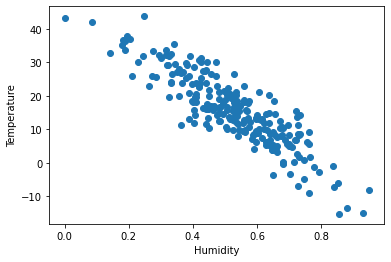

In [10]:
# plotting training points
plot_points(x_train,y_train, "Humidity", "Temperature")

In [11]:
# initialised theta
np.random.seed(2)
theta = np.random.rand(2,1)
# hypothesis of model
def hypothesis(X, theta):
    """Predicts output feature given input feature and theta"""
    return theta[0] + theta[1] * X

In [12]:
# plots line of regression
def draw_line(theta):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = hypothesis(x_vals, theta)
    plt.plot(x_vals, y_vals, '--')

In [13]:
# plots points and lines
def draw_points_and_lines(X, Y, xlabel, ylabel, theta):
    """Draws lines and points"""
    plot_points(X, Y, xlabel, ylabel)
    draw_line(theta)

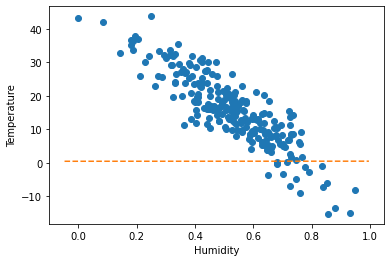

In [14]:
# draw line of regression without traing model
draw_points_and_lines(x_train,y_train, "Humidity", "Temperature", theta)

In [15]:
# cost function
m = len(X)
def cost(X, Y, theta):
    """Returns cost"""
    return (1/(2*m)) * np.sum((hypothesis(X, theta) - Y) ** 2)

In [16]:
# initial cost without trraining model
cost(x_train,y_train, theta)

138.29172239428638

In [17]:
# minimize cost
def gradient_descent(X, Y, theta, alpha, steps):
    for i in range(steps):
        old_cost = cost(X, Y, theta)
        temp0 = theta[0] - alpha * ((1/m) * np.sum(hypothesis(X, theta) - Y))
        temp1 = theta[1] - alpha * ((1/m) * np.dot((hypothesis(X, theta) - Y), X))
        theta[0] = temp0
        theta[1] = temp1
        new_cost = cost(X, Y, theta)
        if new_cost > old_cost:
            print("WARNING!!! COST INCREASING")
        else:
            print("Cost Decresing", new_cost)

In [18]:
theta

array([[0.4359949 ],
       [0.02592623]])

In [19]:
# train model of 10000 iterations
gradient_descent(x_train,y_train, theta, alpha=0.02 , steps=10000)
theta

Cost Decresing 134.81735942060922
Cost Decresing 131.48290426863556
Cost Decresing 128.28267988306538
Cost Decresing 125.21123959454216
Cost Decresing 122.26335777012594
Cost Decresing 119.43402084318922
Cost Decresing 116.71841870733763
Cost Decresing 114.11193645958281
Cost Decresing 111.61014647859395
Cost Decresing 109.20880082442993
Cost Decresing 106.90382394670574
Cost Decresing 104.6913056886761
Cost Decresing 102.56749457522764
Cost Decresing 100.5287913732579
Cost Decresing 98.57174291338701
Cost Decresing 96.69303616239714
Cost Decresing 94.88949253622381
Cost Decresing 93.15806244373816
Cost Decresing 91.4958200519529
Cost Decresing 89.89995826366734
Cost Decresing 88.36778389892932
Cost Decresing 86.8967130720434
Cost Decresing 85.48426675618933
Cost Decresing 84.12806652803717
Cost Decresing 82.82583048505474
Cost Decresing 81.57536932849875
Cost Decresing 80.37458260536627
Cost Decresing 79.2214551028552
Cost Decresing 78.11405338914507
Cost Decresing 77.05052249455962
C

Cost Decresing 34.019048597580095
Cost Decresing 34.00398801174303
Cost Decresing 33.98893692607516
Cost Decresing 33.973895334583794
Cost Decresing 33.958863231280034
Cost Decresing 33.943840610178775
Cost Decresing 33.92882746529866
Cost Decresing 33.91382379066212
Cost Decresing 33.89882958029536
Cost Decresing 33.88384482822836
Cost Decresing 33.868869528494834
Cost Decresing 33.853903675132294
Cost Decresing 33.838947262181996
Cost Decresing 33.82400028368895
Cost Decresing 33.80906273370196
Cost Decresing 33.79413460627351
Cost Decresing 33.77921589545992
Cost Decresing 33.764306595321194
Cost Decresing 33.749406699921124
Cost Decresing 33.734516203327225
Cost Decresing 33.719635099610755
Cost Decresing 33.70476338284672
Cost Decresing 33.68990104711387
Cost Decresing 33.67504808649468
Cost Decresing 33.66020449507534
Cost Decresing 33.645370266945804
Cost Decresing 33.63054539619974
Cost Decresing 33.61572987693453
Cost Decresing 33.600923703251304
Cost Decresing 33.586126869254

Cost Decresing 23.906683237230627
Cost Decresing 23.89800149898957
Cost Decresing 23.889325237161117
Cost Decresing 23.88065444829076
Cost Decresing 23.871989128926174
Cost Decresing 23.863329275617225
Cost Decresing 23.854674884915934
Cost Decresing 23.8460259533765
Cost Decresing 23.837382477555312
Cost Decresing 23.828744454010916
Cost Decresing 23.82011187930403
Cost Decresing 23.81148474999755
Cost Decresing 23.802863062656535
Cost Decresing 23.794246813848208
Cost Decresing 23.785636000141956
Cost Decresing 23.777030618109343
Cost Decresing 23.76843066432408
Cost Decresing 23.759836135362047
Cost Decresing 23.75124702780128
Cost Decresing 23.742663338221995
Cost Decresing 23.734085063206518
Cost Decresing 23.725512199339374
Cost Decresing 23.716944743207236
Cost Decresing 23.708382691398914
Cost Decresing 23.69982604050537
Cost Decresing 23.691274787119735
Cost Decresing 23.682728927837278
Cost Decresing 23.674188459255415
Cost Decresing 23.6656533779737
Cost Decresing 23.6571236

Cost Decresing 18.11751844965734
Cost Decresing 18.11248849797384
Cost Decresing 18.107461719167713
Cost Decresing 18.102438111237515
Cost Decresing 18.097417672183063
Cost Decresing 18.09240040000545
Cost Decresing 18.08738629270701
Cost Decresing 18.082375348291354
Cost Decresing 18.077367564763343
Cost Decresing 18.0723629401291
Cost Decresing 18.067361472396005
Cost Decresing 18.062363159572698
Cost Decresing 18.057367999669072
Cost Decresing 18.052375990696266
Cost Decresing 18.047387130666692
Cost Decresing 18.042401417594004
Cost Decresing 18.03741884949311
Cost Decresing 18.032439424380172
Cost Decresing 18.027463140272612
Cost Decresing 18.02248999518908
Cost Decresing 18.017519987149505
Cost Decresing 18.012553114175034
Cost Decresing 18.007589374288088
Cost Decresing 18.002628765512323
Cost Decresing 17.997671285872645
Cost Decresing 17.992716933395204
Cost Decresing 17.987765706107396
Cost Decresing 17.98281760203786
Cost Decresing 17.97787261921648
Cost Decresing 17.972930

Cost Decresing 14.386194674029321
Cost Decresing 14.383518429401285
Cost Decresing 14.380843872939765
Cost Decresing 14.378171003579878
Cost Decresing 14.375499820257392
Cost Decresing 14.372830321908769
Cost Decresing 14.370162507471132
Cost Decresing 14.367496375882277
Cost Decresing 14.364831926080667
Cost Decresing 14.362169157005436
Cost Decresing 14.359508067596384
Cost Decresing 14.35684865679399
Cost Decresing 14.354190923539385
Cost Decresing 14.351534866774388
Cost Decresing 14.34888048544146
Cost Decresing 14.34622777848376
Cost Decresing 14.343576744845093
Cost Decresing 14.340927383469927
Cost Decresing 14.33827969330341
Cost Decresing 14.335633673291348
Cost Decresing 14.332989322380213
Cost Decresing 14.330346639517142
Cost Decresing 14.327705623649933
Cost Decresing 14.32506627372705
Cost Decresing 14.322428588697628
Cost Decresing 14.31979256751145
Cost Decresing 14.317158209118974
Cost Decresing 14.314525512471308
Cost Decresing 14.311894476520235
Cost Decresing 14.30

Cost Decresing 12.400900214292989
Cost Decresing 12.399476287034883
Cost Decresing 12.398053257985518
Cost Decresing 12.396631126578306
Cost Decresing 12.395209892247019
Cost Decresing 12.393789554425785
Cost Decresing 12.392370112549088
Cost Decresing 12.390951566051767
Cost Decresing 12.389533914369023
Cost Decresing 12.388117156936408
Cost Decresing 12.38670129318983
Cost Decresing 12.385286322565559
Cost Decresing 12.383872244500214
Cost Decresing 12.38245905843077
Cost Decresing 12.381046763794561
Cost Decresing 12.379635360029274
Cost Decresing 12.37822484657295
Cost Decresing 12.376815222863986
Cost Decresing 12.37540648834113
Cost Decresing 12.373998642443485
Cost Decresing 12.372591684610512
Cost Decresing 12.371185614282025
Cost Decresing 12.369780430898183
Cost Decresing 12.368376133899504
Cost Decresing 12.36697272272687
Cost Decresing 12.365570196821492
Cost Decresing 12.364168555624952
Cost Decresing 12.362767798579178
Cost Decresing 12.361367925126453
Cost Decresing 12.3

Cost Decresing 11.403601543911044
Cost Decresing 11.402806709451642
Cost Decresing 11.402012376371262
Cost Decresing 11.40121854435364
Cost Decresing 11.400425213082704
Cost Decresing 11.399632382242586
Cost Decresing 11.398840051517618
Cost Decresing 11.398048220592328
Cost Decresing 11.397256889151441
Cost Decresing 11.396466056879884
Cost Decresing 11.395675723462785
Cost Decresing 11.394885888585469
Cost Decresing 11.394096551933456
Cost Decresing 11.39330771319247
Cost Decresing 11.392519372048428
Cost Decresing 11.391731528187448
Cost Decresing 11.390944181295845
Cost Decresing 11.390157331060136
Cost Decresing 11.389370977167028
Cost Decresing 11.388585119303427
Cost Decresing 11.387799757156444
Cost Decresing 11.387014890413381
Cost Decresing 11.38623051876174
Cost Decresing 11.385446641889219
Cost Decresing 11.38466325948371
Cost Decresing 11.383880371233309
Cost Decresing 11.3830979768263
Cost Decresing 11.382316075951174
Cost Decresing 11.381534668296606
Cost Decresing 11.38

Cost Decresing 10.825496433352727
Cost Decresing 10.825066265740626
Cost Decresing 10.824636369476872
Cost Decresing 10.8242067443903
Cost Decresing 10.823777390309855
Cost Decresing 10.823348307064585
Cost Decresing 10.822919494483648
Cost Decresing 10.822490952396308
Cost Decresing 10.822062680631944
Cost Decresing 10.821634679020033
Cost Decresing 10.821206947390161
Cost Decresing 10.820779485572032
Cost Decresing 10.820352293395443
Cost Decresing 10.819925370690305
Cost Decresing 10.81949871728664
Cost Decresing 10.819072333014574
Cost Decresing 10.818646217704337
Cost Decresing 10.818220371186266
Cost Decresing 10.817794793290814
Cost Decresing 10.81736948384853
Cost Decresing 10.81694444269008
Cost Decresing 10.816519669646222
Cost Decresing 10.816095164547843
Cost Decresing 10.815670927225911
Cost Decresing 10.815246957511523
Cost Decresing 10.814823255235867
Cost Decresing 10.814399820230246
Cost Decresing 10.813976652326069
Cost Decresing 10.813553751354846
Cost Decresing 10.8

Cost Decresing 10.483772018929667
Cost Decresing 10.48355740998082
Cost Decresing 10.483342936406611
Cost Decresing 10.483128598121642
Cost Decresing 10.482914395040575
Cost Decresing 10.482700327078128
Cost Decresing 10.482486394149058
Cost Decresing 10.482272596168196
Cost Decresing 10.482058933050412
Cost Decresing 10.48184540471064
Cost Decresing 10.481632011063857
Cost Decresing 10.4814187520251
Cost Decresing 10.48120562750946
Cost Decresing 10.480992637432081
Cost Decresing 10.480779781708158
Cost Decresing 10.480567060252945
Cost Decresing 10.48035447298174
Cost Decresing 10.480142019809902
Cost Decresing 10.479929700652848
Cost Decresing 10.479717515426032
Cost Decresing 10.479505464044976
Cost Decresing 10.47929354642525
Cost Decresing 10.479081762482481
Cost Decresing 10.47887011213234
Cost Decresing 10.47865859529056
Cost Decresing 10.478447211872927
Cost Decresing 10.478235961795273
Cost Decresing 10.478024844973488
Cost Decresing 10.47781386132352
Cost Decresing 10.477603

Cost Decresing 10.324570594407646
Cost Decresing 10.324456409206153
Cost Decresing 10.324342296032322
Cost Decresing 10.324228254840714
Cost Decresing 10.324114285585917
Cost Decresing 10.324000388222567
Cost Decresing 10.323886562705306
Cost Decresing 10.323772808988812
Cost Decresing 10.3236591270278
Cost Decresing 10.323545516777004
Cost Decresing 10.32343197819119
Cost Decresing 10.32331851122515
Cost Decresing 10.32320511583371
Cost Decresing 10.323091791971716
Cost Decresing 10.322978539594054
Cost Decresing 10.322865358655624
Cost Decresing 10.322752249111367
Cost Decresing 10.32263921091625
Cost Decresing 10.322526244025264
Cost Decresing 10.322413348393427
Cost Decresing 10.322300523975793
Cost Decresing 10.322187770727439
Cost Decresing 10.322075088603473
Cost Decresing 10.321962477559028
Cost Decresing 10.321849937549269
Cost Decresing 10.321737468529385
Cost Decresing 10.3216250704546
Cost Decresing 10.321512743280158
Cost Decresing 10.321400486961338
Cost Decresing 10.3212

Cost Decresing 10.236112033452983
Cost Decresing 10.236053647627678
Cost Decresing 10.235995298631966
Cost Decresing 10.235936986442612
Cost Decresing 10.235878711036397
Cost Decresing 10.235820472390126
Cost Decresing 10.235762270480604
Cost Decresing 10.235704105284658
Cost Decresing 10.235645976779134
Cost Decresing 10.235587884940882
Cost Decresing 10.235529829746776
Cost Decresing 10.2354718111737
Cost Decresing 10.235413829198555
Cost Decresing 10.23535588379825
Cost Decresing 10.23529797494972
Cost Decresing 10.235240102629906
Cost Decresing 10.235182266815764
Cost Decresing 10.235124467484269
Cost Decresing 10.235066704612407
Cost Decresing 10.235008978177179
Cost Decresing 10.2349512881556
Cost Decresing 10.234893634524703
Cost Decresing 10.234836017261527
Cost Decresing 10.234778436343142
Cost Decresing 10.234720891746612
Cost Decresing 10.234663383449028
Cost Decresing 10.234605911427494
Cost Decresing 10.234548475659127
Cost Decresing 10.234491076121056
Cost Decresing 10.23

array([[ 45.24619654],
       [-56.35892739]])

In [20]:
# cost after traing model
cost(x_train,y_train, theta)

10.222107140857595

In [21]:
# value of theta after training 
theta

array([[ 45.24619654],
       [-56.35892739]])

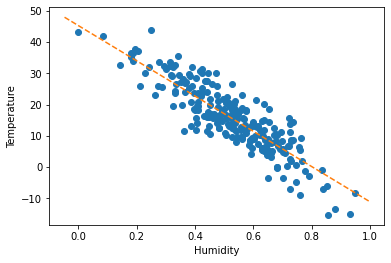

In [22]:
# regression line after traing model
draw_points_and_lines(x_train,y_train, "Humidity", "Temperature", theta)

In [23]:
x = np.array([0.9])
hypothesis(x, theta)

array([-5.47683812])

In [24]:
# prediction
y_predict = hypothesis(x_test, theta)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
0,6.918243,8.133340
1,24.203971,25.302423
2,17.560260,16.628462
3,-5.433452,5.148425
4,9.650354,11.744665
5,-4.253388,2.168339
6,1.325959,6.073666
7,9.074647,14.312585
8,14.448332,14.978135
9,-4.202040,-8.835854


In [25]:
y_train_predict = hypothesis(x_train, theta)
# Accuracy of train data
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

Mean Absolute Error: 4.088423597747075
Mean Squared Error: 25.555267852143984
Root Mean Squared Error: 5.0552218400525195


In [26]:
# Accuracy of test data
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 4.007632913528168
Mean Squared Error: 26.25413418115797
Root Mean Squared Error: 5.123878821865127
